<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/ANN_fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4431872/4422102 [==============================] - 0s 0us/step


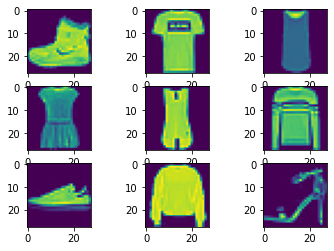

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [=============================

In [6]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()
X = X_test
X_train =X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=128,epochs =5, verbose=1,validation_data=(X_test,y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0774 - accuracy: 0.9798
Test loss =  0.07737959176301956
Test acuracy 0.9797999858856201


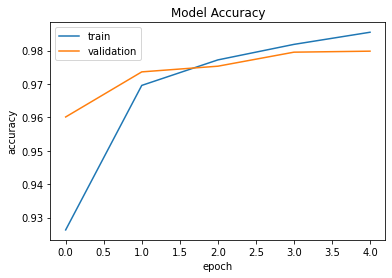

In [5]:
score = model.evaluate(X_test, y_test, verbose =1 )
print('Test loss = ',score[0])
print('Test acuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc ='upper left')

In [ ]:
Label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
import numpy as np
y_pred = y_test
test =15
plt.title(str(Label[np.argmax(model.predict(X[test].reshape(-1,3072)))]))
y_pred[test]
plt.imshow(X[test])